# Regression Analysis

## Table of Contents

1. [Setup and Installation](#2-setup-and-installation)
   - [1.1 Import Libraries](#31-import-libraries)
   - [1.2 Data Loading & Cleanup](#32-data-loading--cleanup)

2. [Data Extraction & Inspection](#3-Data-Extraction-&-Inspection) 
   - [2.1 Load CSV](#32-Load-CSV)
   - [2.2 Inspect dataset](#32-Inspect-dataset)

3. [Data Cleaning and Transformation](#3-data-cleaning-and-transformation)
   - [3.1 Data Cleaning Process](#31-data-cleaning-process)
   - [3.2 Cleaned Dataset Preview](#32-cleaned-dataset-preview)

4. [Exploratory Data Analysis](#4-exploratory-data-analysis)
   - [4.1 seasonal-analysis ](#41-seasonal-analysis)
   - [4.2 price-trends ](#42-price-trends)

5. [Model Building](#5-model-building)
   - [5.1 model-selection ](#51-model-selection)
   - [5.2 model-training ](#52-model-training)
   - [5.3 model-evaluation ](#53-model-evaluation)
   


## 1. Setup and Installation

### Required Packages
The following libraries are required for this analysis:
- **Pandas**: Data manipulation and analysis
- **Matplotlib**: Data visualization
- **Numpy**: Numerical manupilations
- **Statsmodel** : Fit data to models
- **SKLEAN** : Machine learning algorithms

### 1.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### 1.2 Data Loading & Cleanup

In [2]:
from data_load import clean_dataframe_columns

#Load csv to df
df = pd.read_csv('co2_emissions_from_agri.csv')

# Clean columns using the function imported from data_load.py
df = clean_dataframe_columns(df)

# Now df has cleaned and reordered columns
print(df.head())

Reordered columns successfully!
   total_emission         area  year  savanna_fires  forest_fires  \
0     2198.963539  Afghanistan  1990        14.7237        0.0557   
1     2323.876629  Afghanistan  1991        14.7237        0.0557   
2     2356.304229  Afghanistan  1992        14.7237        0.0557   
3     2368.470529  Afghanistan  1993        14.7237        0.0557   
4     2500.768729  Afghanistan  1994        14.7237        0.0557   

   crop_residues  rice_cultivation  drained_organic_soils_co  \
0       205.6077            686.00                       0.0   
1       209.4971            678.16                       0.0   
2       196.5341            686.00                       0.0   
3       230.8175            686.00                       0.0   
4       242.0494            705.60                       0.0   

   pesticides_manufacturing  food_transport  ...  manure_left_on_pasture  \
0                 11.807483         63.1152  ...               1590.5319   
1               

In [3]:
!pip install -r requirements.txt

## 2. Data Extraction

2.1 Load CSV Dataset

2.2 Data Inspection  

In [4]:
# For a more detailed summary including non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_emission                   6965 non-null   float64
 1   area                             6965 non-null   object 
 2   year                             6965 non-null   int64  
 3   savanna_fires                    6934 non-null   float64
 4   forest_fires                     6872 non-null   float64
 5   crop_residues                    5576 non-null   float64
 6   rice_cultivation                 6965 non-null   float64
 7   drained_organic_soils_co         6965 non-null   float64
 8   pesticides_manufacturing         6965 non-null   float64
 9   food_transport                   6965 non-null   float64
 10  forestland                       6472 non-null   float64
 11  net_forest_conversion            6472 non-null   float64
 12  food_household_consu

In [5]:
# Describe numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_emission,6965.0,6.409124e+04,2.283130e+05,-391884.056300,5221.243741,1.214765e+04,3.513973e+04,3.115114e+06
year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
savanna_fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
forest_fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
crop_residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
rice_cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
drained_organic_soils_co,6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
pesticides_manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
food_transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05


## Checking for linearity

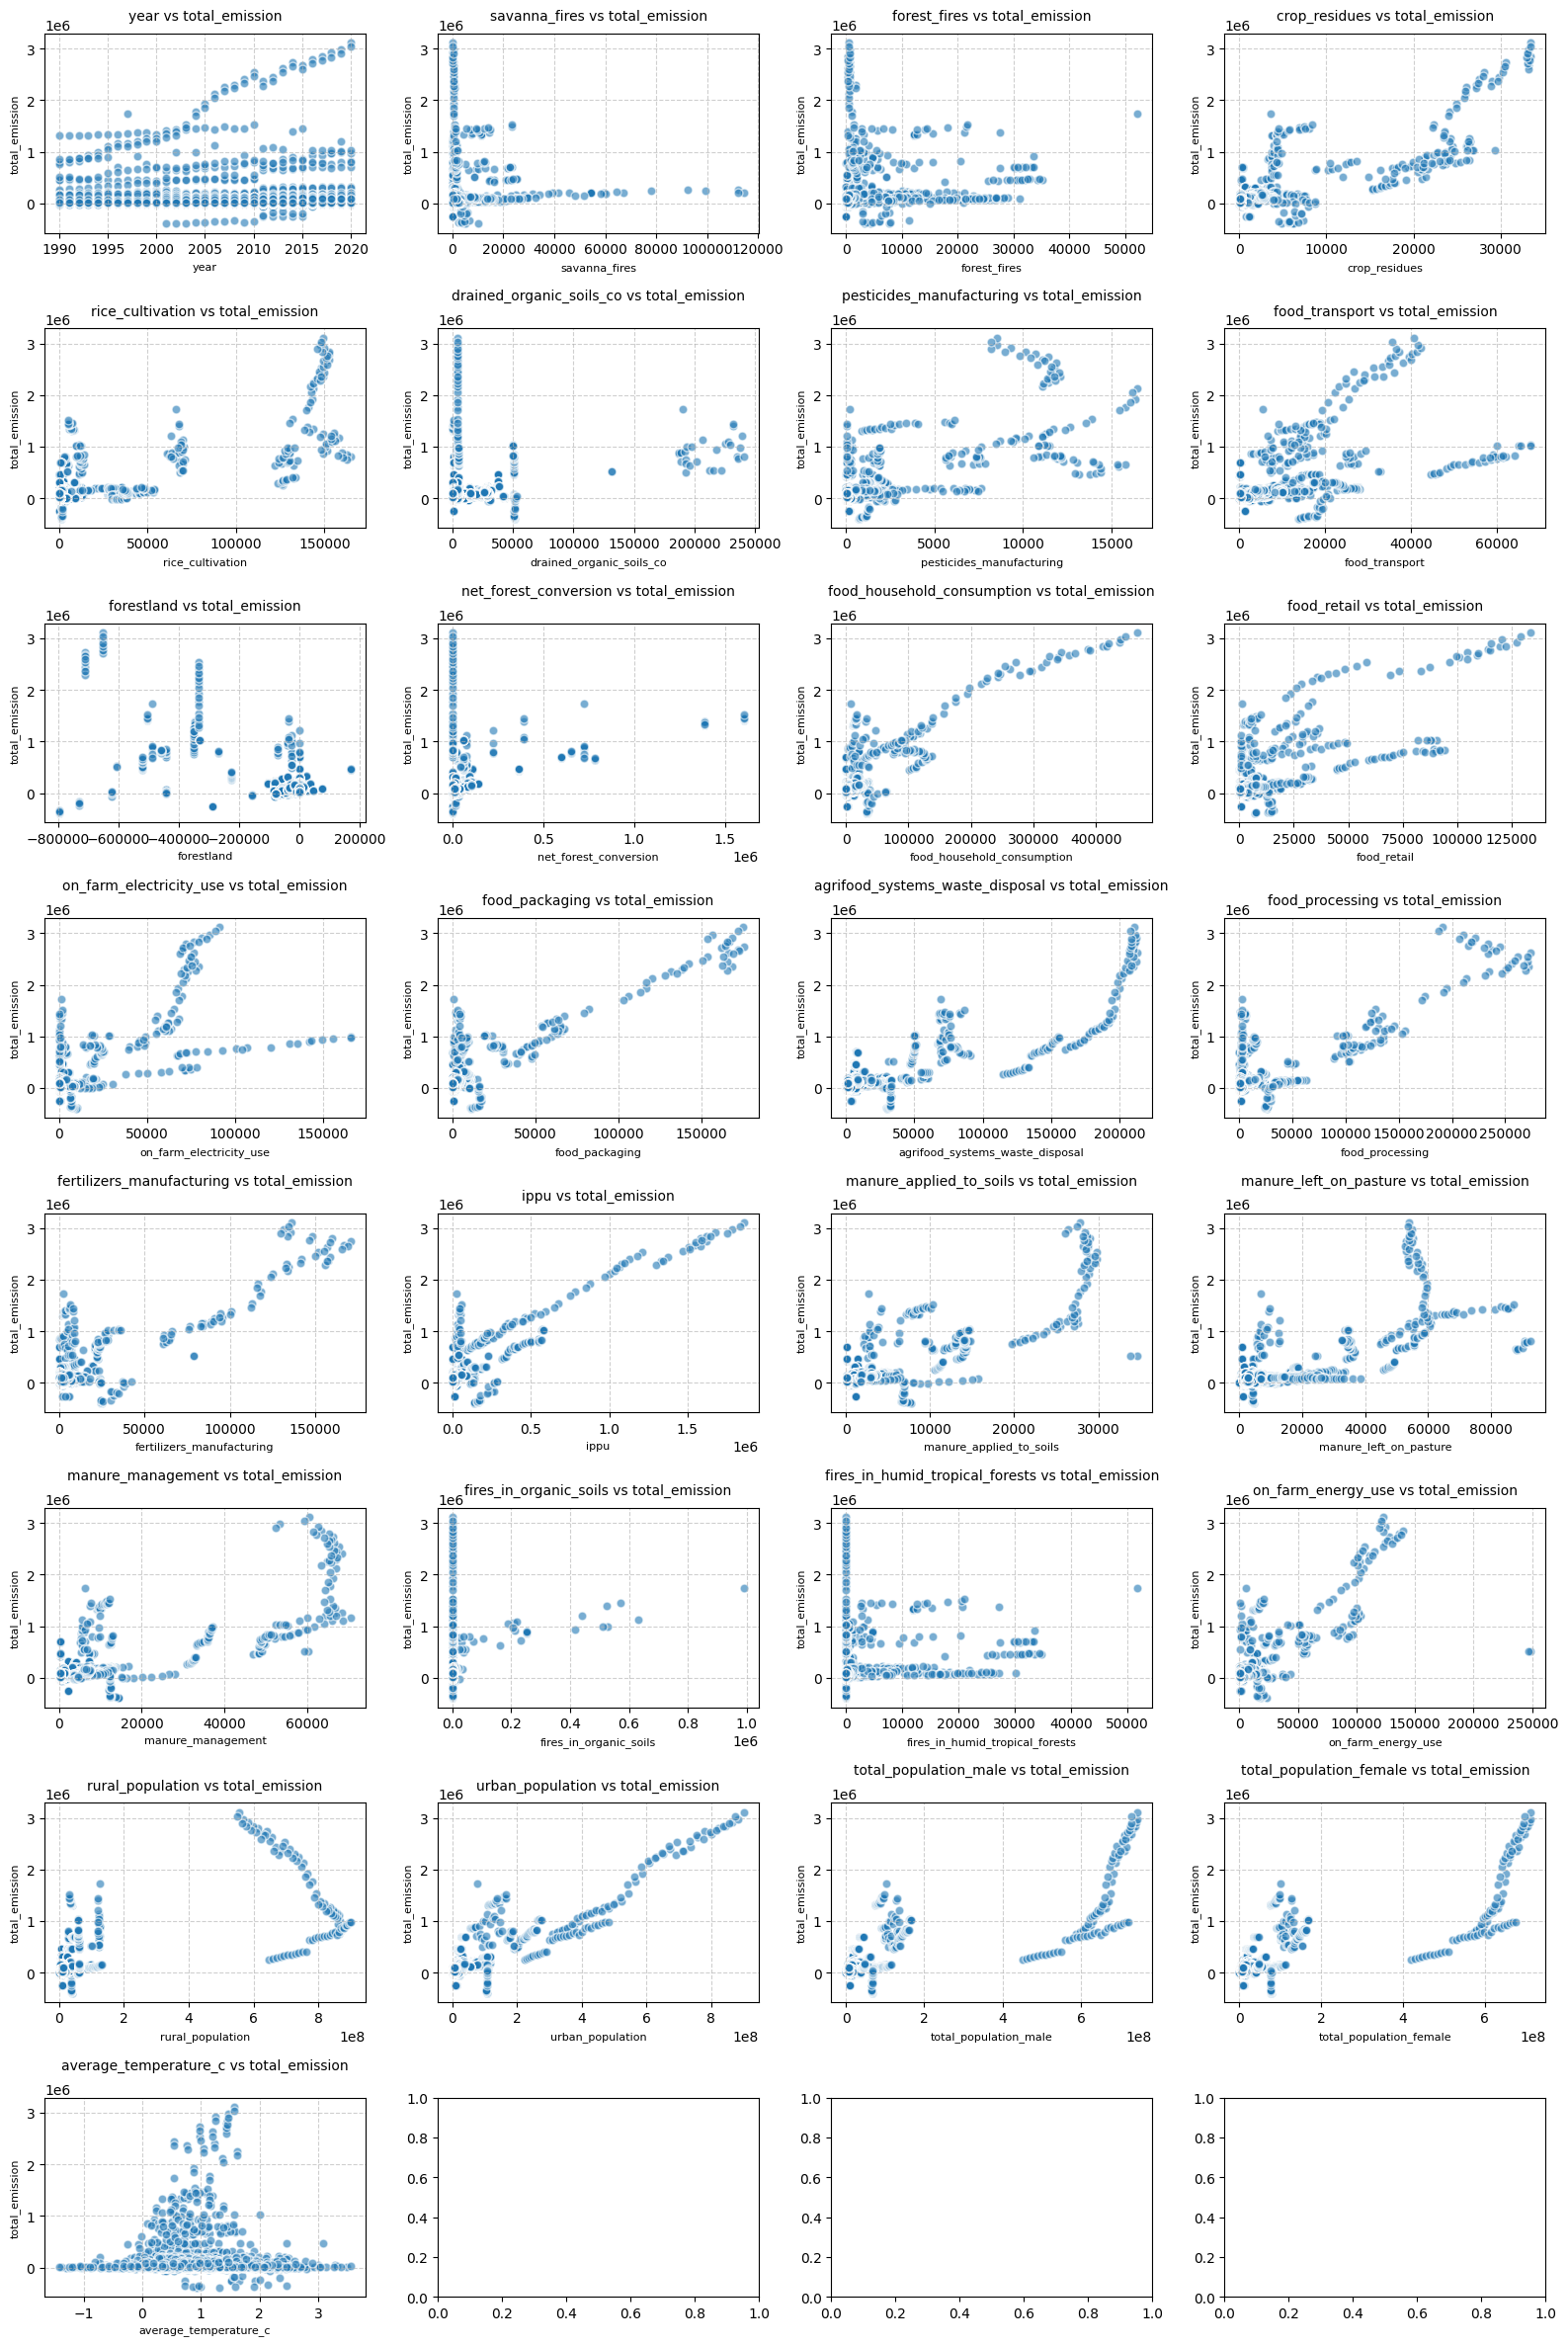

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set the target column
target = 'total_emission'

# Get numerical columns (excluding the target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target in numerical_cols:
    numerical_cols.remove(target)

# Calculate grid layout
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create figure with appropriate size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 3 * n_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten axes for easier iteration
axs = axs.ravel()

# Plot each feature against the target
for idx, col in enumerate(numerical_cols):
    axs[idx].scatter(
        x=df[col], 
        y=df[target],
        alpha=0.6,
        color='#1f77b4',
        edgecolor='w',
        s=40
    )
    
    # Set labels
    axs[idx].set_title(f"{col} vs {target.split(' (')[0]}", fontsize=10, pad=10)
    axs[idx].set_xlabel(col, fontsize=8)
    axs[idx].set_ylabel(target, fontsize=8)
    axs[idx].grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

#### Notes from visuals produced above to pick up few linearity from different variables

- It appears that a significant amount of our variables have an approximately linear relationship. Here, a trend between each of `food household consumption, Food Packgaging, IPPU, Fertilization Manufacturing, Urban or Rural Population`, and `total_emission` seems to exist.

Based on these findings, it appears that there is enough linearity present to apply a linear regression model.

etc...


## Checking for multicollinearity

In [7]:
print("Missing values:\n", df.isna().sum())

Missing values:
 total_emission                        0
area                                  0
year                                  0
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
rice_cultivation                      0
drained_organic_soils_co              0
pesticides_manufacturing              0
food_transport                        0
forestland                          493
net_forest_conversion               493
food_household_consumption          473
food_retail                           0
on_farm_electricity_use               0
food_packaging                        0
agrifood_systems_waste_disposal       0
food_processing                       0
fertilizers_manufacturing             0
ippu                                743
manure_applied_to_soils             928
manure_left_on_pasture                0
manure_management                   928
fires_in_organic_soils                0
fires_in_humid_tropical

In [8]:
#Generate the regression string
formula_str = df.columns[0]+' ~ '+'+'.join(df.columns[1:])
formula_str

'total_emission ~ area+year+savanna_fires+forest_fires+crop_residues+rice_cultivation+drained_organic_soils_co+pesticides_manufacturing+food_transport+forestland+net_forest_conversion+food_household_consumption+food_retail+on_farm_electricity_use+food_packaging+agrifood_systems_waste_disposal+food_processing+fertilizers_manufacturing+ippu+manure_applied_to_soils+manure_left_on_pasture+manure_management+fires_in_organic_soils+fires_in_humid_tropical_forests+on_farm_energy_use+rural_population+urban_population+total_population_male+total_population_female+average_temperature_c'

In [24]:
#Construct and fit the model using ols
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

#Print the summary of the model
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.131e+28
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:09:09   Log-Likelihood:                 79665.
No. Observations:                4546   AIC:                        -1.590e+05
Df Residuals:                    4361   BIC:                        -1.578e+05
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------